# Library dataset exploration

Firstly, we need to gather the data. If data already exists, this function will only download new data.

Notice: this requires a Statbus token. The old one. How to obtain it:

1. Go to [StatBus](https://sb.atlantaned.space/) and log in
2. Locate your cookies.
    - Chrome: F12 -> Application -> Storage -> Cookies
    - Firefox: F12 -> Storage -> Cookies
3. Get the PHPSESSID cookie value

In [1]:
#from scraper import generate_library
#generate_library()

In [2]:
import pandas as pd
import bs4

Data visualization library. This wasn't specified in requirements as it's only used in IPython notebooks. It can be installed with `python3 -m pip install seaborn`.

In [3]:
import seaborn as sns

In [4]:
df = pd.read_csv("library/library.csv")
df.drop("ckey", axis=1, inplace=True) # Privacy
df

,id,author,title,content,category,datetime,deleted,round_id_created
0,3,Anonymous,The Lusty Xenomorphs Maid,"<p>Alien Queen hisses: Certainly not, kind sir...",Fiction,0000-00-00 00:00:00,NaN,0
1,4,Anonymous,R.A.CH.NA User Manual,"<p>The Robust AI, Chiromancer, and Navigator (...",Reference,0000-00-00 00:00:00,NaN,0
2,6,Martin Luther HONK,The Writings of Martin Luther HONK,<i><p>&#8220;I have a dream that one day this ...,Non-Fiction,0000-00-00 00:00:00,NaN,0
3,8,Anonymous,The Expedition - Part One,<b><tt><p>We came to the Ethereal Realm on the...,Fiction,0000-00-00 00:00:00,NaN,0
4,9,Anonymous,The Expedition - Part Two,<b><tt><p>\nThe orange sun was resting on the ...,Fiction,0000-00-00 00:00:00,NaN,0
...,...,...,...,...,...,...,...,...
5315,10146,Edward Kruger,IT&#39;S BEEN SO LONG,"<span style=""color:blue;font-family:'Verdana';...",Reference,2021-11-20 10:30:32,NaN,173354
5316,10147,Picks-The-Nose,WGW,"<span style=""color:black;font-family:'Verdana'...",Fiction,2021-11-20 19:15:01,NaN,173371
5317,10148,A curator,WGW,"<span style=""color:black;font-family:'Segoe Sc...",Fiction,2021-11-20 20:01:02,1.0,173375
5318,10149,Bindy Johal,Book: Moths Exposed,"<font face=""Verdana"" color=red>Moths, are one ...",Fiction,2021-11-21 03:19:47,NaN,173391


In [5]:
df.dtypes

id                    int64
author               object
title                object
content              object
category             object
datetime             object
deleted             float64
round_id_created      int64
dtype: object

An important step is to check if we have null values. In Pandas, `NULL`, `N/A` and `NaN` are the same, and all functions checking for such missing values should return the same value. The different missing data values exist because Pandas' DataFrames are based on R's DataFrames, but since Pandas is built on top of NumPy which only knows `NaN`, those three act the same way. The same cannot be said for R.

In [6]:
df.isna().sum()

id                     0
author                 1
title                  0
content              119
category              84
datetime               0
deleted             3334
round_id_created       0
dtype: int64

Some books have no content, we have no need for those. They are removed later.

In [7]:
df[df["content"].isna()]

,id,author,title,content,category,datetime,deleted,round_id_created
150,560,Anonymous,The Mimes Elegant Story,NaN,Fiction,0000-00-00 00:00:00,NaN,0
639,5445,Anonymous,The Void,NaN,Religion,2013-06-11 21:56:52,NaN,0
656,5465,Nicolas Delacour,All reasons why clowns are better than mimes.,NaN,Reference,2013-06-17 13:44:00,NaN,0
1313,6144,Anonymous,The List of People You Are Going to Fuck,NaN,Reference,2014-06-18 13:06:17,NaN,0
1471,6302,Anonymous,Print Job #245,NaN,Fiction,2014-10-14 15:51:04,NaN,0
...,...,...,...,...,...,...,...,...
4716,9547,Nanotrasen,Book: Space Law,NaN,Fiction,2020-07-30 19:23:07,NaN,143175
4727,9558,Henry Henryson,Not Bee movie script,NaN,Religion,2020-08-02 11:05:59,NaN,143367
4747,9578,Paco Macho,Lusty Argonian 2,NaN,Adult,2020-08-16 21:18:19,NaN,144407
5054,9885,Robert Paulsen,Story of Bees,NaN,Religion,2021-03-11 23:49:21,NaN,158028


In [8]:
df[df["deleted"] == 0]

,id,author,title,content,category,datetime,deleted,round_id_created
577,5374,lolpwnt,The Heroic Saga of Brother-Captain Matthias W,Brother-Captain Matthias IronSoul Ward the All...,Religion,0000-00-00 00:00:00,0.0,0
2220,7051,Tara Gilesbie,My Immortal,"<font face=""Verdana"" color=blue>Chapter 1.\n\n...",Adult,2016-03-29 13:08:01,0.0,0
2695,7526,Errybody-Lieks-Skreksy,Woody got wood,"<font face=""Verdana"" color=red><U><B>Woody got...",Non-Fiction,2016-12-17 20:56:07,0.0,0
3448,8279,Guy Stevens,Book: Fluke Ops,"<font face=""Verdana"" color=black><font size = ...",Fiction,2018-06-21 18:37:36,0.0,89830
3549,8380,Francium CDXX,Plasmaman Rap,"<font face=""Verdana"" color=red><center><b>Plas...",Adult,2018-09-17 10:08:44,0.0,94018
3679,8510,Ebony Dark&#39;ness Dementia Raven Way,My Immortal CHP 1-4,"<font face=""Verdana"" color=blue>Chapter 1.<br>...",Adult,2019-01-21 19:42:02,0.0,100622
3847,8678,Hobo the Bobo,Hobo survival,"<font face=""Verdana"" color=black>Being a hobo ...",Adult,2019-04-14 13:48:57,0.0,106157
4512,9343,Bindy Johal,Sec and Catgirl 2,"<font face=""Verdana"" color=black>After, Edgar ...",Adult,2020-01-12 23:34:15,0.0,128036
4550,9381,Bindy Johal,Sec and Catgirl 3,"After Hanna died, JC and Darius didn&#39;t kno...",Adult,2020-01-26 04:48:56,0.0,128944
4744,9575,SCP Foundation,Book: SCP-173,"<span style=""color:'black';font-family:'Verdan...",Fiction,2020-08-13 08:11:14,0.0,144165


In [9]:
df[df["deleted"] == 1]

,id,author,title,content,category,datetime,deleted,round_id_created
19,35,Rlim Shaikorth,Vibration,The big Cat groaned as it dug into the hillsid...,Adult,0000-00-00 00:00:00,1.0,0
27,84,Devon Pfeiffer,Adaption Part 4,"A little while later, she was on the sofa, snu...",Adult,0000-00-00 00:00:00,1.0,0
29,90,Leeroy Freeman,Botanics for Botanists,<font face=calligrapher>Introduction:\nHello. ...,Reference,0000-00-00 00:00:00,1.0,0
39,109,Anonymous,The Welder,"<font face=calligrapher><object width=""480"" he...",Fiction,0000-00-00 00:00:00,1.0,0
40,117,Alexander Murphy,Space Law,<p><h1>SPACE LAW</h1></p>\n<hr>\n\n<p>Due to m...,Reference,0000-00-00 00:00:00,1.0,0
...,...,...,...,...,...,...,...,...
5302,10133,NotoriousStinky,Shattered Catboy Mindset,"<span style=""color:black;font-family:'Verdana'...",Religion,2021-11-10 14:51:57,1.0,172821
5303,10134,NotoriousStinky,Shattered Catboy Mindset,"<span style=""color:black;font-family:'Verdana'...",Religion,2021-11-10 15:08:54,1.0,172821
5304,10135,NotoriousStinky,Soiled dreams,"<span style=""color:blue;font-family:'Verdana';...",Fiction,2021-11-10 15:55:41,1.0,172823
5307,10138,Wandering Foolishness,You are GOD,"<font color = #808080><span style=""color:black...",Religion,2021-11-13 13:20:09,1.0,172979


Above we can see that while `deleted` gets set to 1 when a book is deleted. Non-deleted books either have a missing value or a 0. This is most likely because the deleted value starts off as a `NULL` in the database, only ever getting set to 0 if a book is undeleted.

Fill missing values below, and remove all books with no content, as we have no use for those.

In [10]:
df["author"].fillna("Unknown", inplace=True)
df["category"].fillna("Unknown", inplace=True)
df["deleted"].fillna(0, inplace=True)
df["deleted"] = df["deleted"].astype(dtype="int32") # Converting to int32 changes NaN to 0df.groupby(['category']).count()df.groupby(['category']).count()df.groupby(['category']).count()df.groupby(['category']).count()df.groupby(['category']).count()df.groupby(['category']).count()df.groupby(['category']).count()df.groupby(['category']).count()df.groupby(['category']).count()df.groupby(['category']).count()df.groupby(['category']).count()df.groupby(['category']).count()df.groupby(['category']).count()df.groupby(['category']).count()df.groupby(['category']).count()df.groupby(['category']).count()df.groupby(['category']).count()asdsadsadasdaaaasdasdadzxczxcxzcasdasdasdads
df.dropna(inplace=True) # Drop all other rows with missing columns.
df.isna().sum()

id                  0
author              0
title               0
content             0
category            0
datetime            0
deleted             0
round_id_created    0
dtype: int64

In original tests, about 119 lines were dropped, which corresponded to the amount of books with no content.

In [11]:
df.shape

(5201, 8)

In [12]:
df

,id,author,title,content,category,datetime,deleted,round_id_created
0,3,Anonymous,The Lusty Xenomorphs Maid,"<p>Alien Queen hisses: Certainly not, kind sir...",Fiction,0000-00-00 00:00:00,0,0
1,4,Anonymous,R.A.CH.NA User Manual,"<p>The Robust AI, Chiromancer, and Navigator (...",Reference,0000-00-00 00:00:00,0,0
2,6,Martin Luther HONK,The Writings of Martin Luther HONK,<i><p>&#8220;I have a dream that one day this ...,Non-Fiction,0000-00-00 00:00:00,0,0
3,8,Anonymous,The Expedition - Part One,<b><tt><p>We came to the Ethereal Realm on the...,Fiction,0000-00-00 00:00:00,0,0
4,9,Anonymous,The Expedition - Part Two,<b><tt><p>\nThe orange sun was resting on the ...,Fiction,0000-00-00 00:00:00,0,0
...,...,...,...,...,...,...,...,...
5315,10146,Edward Kruger,IT&#39;S BEEN SO LONG,"<span style=""color:blue;font-family:'Verdana';...",Reference,2021-11-20 10:30:32,0,173354
5316,10147,Picks-The-Nose,WGW,"<span style=""color:black;font-family:'Verdana'...",Fiction,2021-11-20 19:15:01,0,173371
5317,10148,A curator,WGW,"<span style=""color:black;font-family:'Segoe Sc...",Fiction,2021-11-20 20:01:02,1,173375
5318,10149,Bindy Johal,Book: Moths Exposed,"<font face=""Verdana"" color=red>Moths, are one ...",Fiction,2021-11-21 03:19:47,0,173391


Let's see how the ~~first~~ (redacted because xeno maid) second books looks

In [13]:
df["content"][1]

'<p>The Robust AI, Chiromancer, and Navigator (R.A.CH.NA) is an advanced artificial intelligence unit designed by Nanotransen Innoventions Corporation. Its purpose is to test the ability of an AI to adapt to its surroundings. To this end, it has been given the tools and programming to observe and learn from its observations. In learning, the R.A.CH.NA unit is able to adjust its reaction to events accordingly. The unit has been also programmed with a dynamic, human-like personality in order to gauge the practicality of an AI of this sort being able to easier assess human emotion. A side effect of this found in preliminary testing is that the R.A.CH.NA unit sometimes exhibits simulated &#8220;emotions&#8221;, based on its observation of humans. Due to its programming, this side-effect is unavoidable, since it will always observe humans and attempt to adapt their behavior to its own personality. It is possible to wipe the unit&#8217;s observation data, though this is not reccommended. Tes

Time to parse the HTML and see if it's fine

In [14]:
bs4.BeautifulSoup(df["content"][1]).get_text(separator=" ")

'The Robust AI, Chiromancer, and Navigator (R.A.CH.NA) is an advanced artificial intelligence unit designed by Nanotransen Innoventions Corporation. Its purpose is to test the ability of an AI to adapt to its surroundings. To this end, it has been given the tools and programming to observe and learn from its observations. In learning, the R.A.CH.NA unit is able to adjust its reaction to events accordingly. The unit has been also programmed with a dynamic, human-like personality in order to gauge the practicality of an AI of this sort being able to easier assess human emotion. A side effect of this found in preliminary testing is that the R.A.CH.NA unit sometimes exhibits simulated “emotions”, based on its observation of humans. Due to its programming, this side-effect is unavoidable, since it will always observe humans and attempt to adapt their behavior to its own personality. It is possible to wipe the unit’s observation data, though this is not reccommended. Testing thus far has sho

Extra spaces and special characters. Remove those

In [15]:
from scraper import preprocess_statbus_text
preprocess_statbus_text(bs4.BeautifulSoup(df["content"][1]).get_text(separator=" "))

'The Robust AI, Chiromancer, and Navigator (R.A.CH.NA) is an advanced artificial intelligence unit designed by Nanotransen Innoventions Corporation. Its purpose is to test the ability of an AI to adapt to its surroundings. To this end, it has been given the tools and programming to observe and learn from its observations. In learning, the R.A.CH.NA unit is able to adjust its reaction to events accordingly. The unit has been also programmed with a dynamic, human-like personality in order to gauge the practicality of an AI of this sort being able to easier assess human emotion. A side effect of this found in preliminary testing is that the R.A.CH.NA unit sometimes exhibits simulated "emotions", based on its observation of humans. Due to its programming, this side-effect is unavoidable, since it will always observe humans and attempt to adapt their behavior to its own personality. It is possible to wipe the unit\'s observation data, though this is not reccommended. Testing thus far has sh

Looks better! Time to replace all text with the preprocessed version

In [16]:
df["content"] = df["content"].apply(lambda content: preprocess_statbus_text(bs4.BeautifulSoup(content).get_text(separator=" ")))
df

,id,author,title,content,category,datetime,deleted,round_id_created
0,3,Anonymous,The Lusty Xenomorphs Maid,"Alien Queen hisses: Certainly not, kind sir! I...",Fiction,0000-00-00 00:00:00,0,0
1,4,Anonymous,R.A.CH.NA User Manual,"The Robust AI, Chiromancer, and Navigator (R.A...",Reference,0000-00-00 00:00:00,0,0
2,6,Martin Luther HONK,The Writings of Martin Luther HONK,"""I have a dream that one day this station will...",Non-Fiction,0000-00-00 00:00:00,0,0
3,8,Anonymous,The Expedition - Part One,We came to the Ethereal Realm on the very earl...,Fiction,0000-00-00 00:00:00,0,0
4,9,Anonymous,The Expedition - Part Two,The orange sun was resting on the horizon by t...,Fiction,0000-00-00 00:00:00,0,0
...,...,...,...,...,...,...,...,...
5315,10146,Edward Kruger,IT&#39;S BEEN SO LONG,IT'S BEEN SO LONG (I dont own the copyright of...,Reference,2021-11-20 10:30:32,0,173354
5316,10147,Picks-The-Nose,WGW,⣿⣿⣿⣿⣇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠉⠛⠻⣿⣿⣿⣿⣿⣿ ⣿⣿⣿⣿⣿⣦⠀⠀⠀⠀⠀⠀⠀⠀⢀⣤⣄⡀⠀⢻...,Fiction,2021-11-20 19:15:01,0,173371
5317,10148,A curator,WGW,⣿⣿⣿⣿⣇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠉⠛⠻⣿⣿⣿⣿⣿⣿ ⣿⣿⣿⣿⣿⣦⠀⠀⠀⠀⠀⠀⠀⠀⢀⣤⣄⡀⠀⢻...,Fiction,2021-11-20 20:01:02,1,173375
5318,10149,Bindy Johal,Book: Moths Exposed,"Moths, are one of the many species that are on...",Fiction,2021-11-21 03:19:47,0,173391


Deleted vs non-deleted books

In [17]:
df["Has the book been deleted"] = df["deleted"].apply(lambda x: "Deleted" if x == 1 else "Not deleted")

<AxesSubplot:xlabel='Has the book been deleted', ylabel='count'>

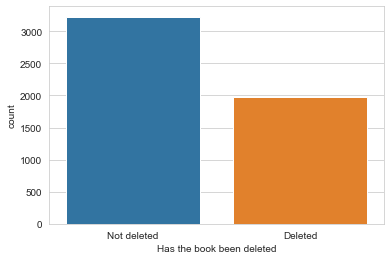

In [18]:
sns.set_style("whitegrid")
sns.countplot(
    x="Has the book been deleted",
    data=df
)

<AxesSubplot:xlabel='Has the book been deleted', ylabel='count'>

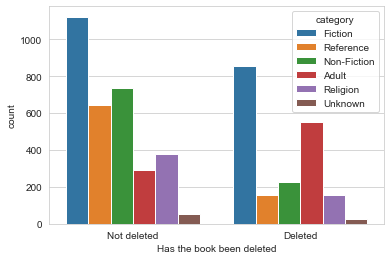

In [19]:
sns.countplot(
    x="Has the book been deleted",
    hue="category",
    data=df
)

In [20]:
df.drop("Has the book been deleted", axis=1, inplace=True)

I will now drop non-relevant data. Category could be counted as relevant, but a book we'd want to smite could be in any of the categories.

In [21]:
df.drop(["id", "category", "datetime", "round_id_created"], axis=1, inplace=True)
df

,author,title,content,deleted
0,Anonymous,The Lusty Xenomorphs Maid,"Alien Queen hisses: Certainly not, kind sir! I...",0
1,Anonymous,R.A.CH.NA User Manual,"The Robust AI, Chiromancer, and Navigator (R.A...",0
2,Martin Luther HONK,The Writings of Martin Luther HONK,"""I have a dream that one day this station will...",0
3,Anonymous,The Expedition - Part One,We came to the Ethereal Realm on the very earl...,0
4,Anonymous,The Expedition - Part Two,The orange sun was resting on the horizon by t...,0
...,...,...,...,...
5315,Edward Kruger,IT&#39;S BEEN SO LONG,IT'S BEEN SO LONG (I dont own the copyright of...,0
5316,Picks-The-Nose,WGW,⣿⣿⣿⣿⣇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠉⠛⠻⣿⣿⣿⣿⣿⣿ ⣿⣿⣿⣿⣿⣦⠀⠀⠀⠀⠀⠀⠀⠀⢀⣤⣄⡀⠀⢻...,0
5317,A curator,WGW,⣿⣿⣿⣿⣇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠉⠛⠻⣿⣿⣿⣿⣿⣿ ⣿⣿⣿⣿⣿⣦⠀⠀⠀⠀⠀⠀⠀⠀⢀⣤⣄⡀⠀⢻...,1
5318,Bindy Johal,Book: Moths Exposed,"Moths, are one of the many species that are on...",0


In [22]:
from nltk.tokenize import word_tokenize
from preprocessing import remove_stopwords, stem
df["processed"] = df["content"].apply(lambda content: ' '.join(stem(remove_stopwords(word_tokenize(content)))))
df

,author,title,content,deleted,processed
0,Anonymous,The Lusty Xenomorphs Maid,"Alien Queen hisses: Certainly not, kind sir! I...",0,alien queen hiss certain kind sir clean chambe...
1,Anonymous,R.A.CH.NA User Manual,"The Robust AI, Chiromancer, and Navigator (R.A...",0,robust ai chiromanc navig r.a.ch.na advanc art...
2,Martin Luther HONK,The Writings of Martin Luther HONK,"""I have a dream that one day this station will...",0,dream one day station rise live true mean cree...
3,Anonymous,The Expedition - Part One,We came to the Ethereal Realm on the very earl...,0,came ether realm earli morn 28th juli 1910 cap...
4,Anonymous,The Expedition - Part Two,The orange sun was resting on the horizon by t...,0,orang sun rest horizon time arriv destin mage ...
...,...,...,...,...,...
5315,Edward Kruger,IT&#39;S BEEN SO LONG,IT'S BEEN SO LONG (I dont own the copyright of...,0,'s long dont copyright song lol lol lol bpm 20...
5316,Picks-The-Nose,WGW,⣿⣿⣿⣿⣇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠉⠛⠻⣿⣿⣿⣿⣿⣿ ⣿⣿⣿⣿⣿⣦⠀⠀⠀⠀⠀⠀⠀⠀⢀⣤⣄⡀⠀⢻...,0,⣿⣿⣿⣿⣇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠉⠛⠻⣿⣿⣿⣿⣿⣿ ⣿⣿⣿⣿⣿⣦⠀⠀⠀⠀⠀⠀⠀⠀⢀⣤⣄⡀⠀⢻...
5317,A curator,WGW,⣿⣿⣿⣿⣇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠉⠛⠻⣿⣿⣿⣿⣿⣿ ⣿⣿⣿⣿⣿⣦⠀⠀⠀⠀⠀⠀⠀⠀⢀⣤⣄⡀⠀⢻...,1,⣿⣿⣿⣿⣇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠉⠛⠻⣿⣿⣿⣿⣿⣿ ⣿⣿⣿⣿⣿⣦⠀⠀⠀⠀⠀⠀⠀⠀⢀⣤⣄⡀⠀⢻...
5318,Bindy Johal,Book: Moths Exposed,"Moths, are one of the many species that are on...",0,moth one mani speci multicultur station form c...


Top 25 words used overall

In [23]:
from nltk import FreqDist
freq_dist = FreqDist(word_tokenize(' '.join(df["processed"])))
for word, frequency in freq_dist.most_common(25):
    print("{w:<15}{f}".format(w=word, f=frequency))

's             15511
n't            8162
one            7143
like           4869
say            4865
time           4672
could          4628
get            4243
back           3997
would          3961
make           3616
look           3376
said           3310
go             3241
head           3142
around         2935
hand           2902
know           2871
use            2816
start          2806
station        2742
want           2730
even           2673
take           2653
see            2615


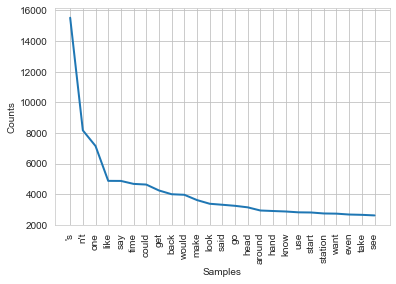

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [24]:
freq_dist.plot(25)

Try 2-grams, let's see what we get

In [25]:
from nltk import ngrams
bigrams = FreqDist(ngrams(word_tokenize(' '.join(df["processed"])), 2))
for phrase, freq in bigrams.most_common(25):
    print("{w:<30}{f}".format(w=str(phrase), f=freq))

('honk', 'honk')              1124
('pie', 'pie')                767
('could', "n't")              758
('ca', "n't")                 729
('one', 'day')                506
('alien', 'queen')            498
("n't", 'know')               431
('space', 'station')          388
('would', "n't")              355
('andi', "'s")                353
('gon', 'na')                 352
('look', 'like')              341
('duke', 'butterfil')         331
('queen', 'hiss')             314
('captain', 'colt')           314
('wo', "n't")                 296
('make', 'sure')              292
('xenomorph', 'maid')         285
('aliv', 'want')              264
('back', 'forth')             254
('butterfil', 'say')          252
('let', "'s")                 251
('andi', 'oh')                248
("n't", 'want')               246
('woodi', 'andi')             245


`('honk', 'honk')              1124` is number is one...

3-grams!

In [26]:
from nltk import ngrams
trigrams = FreqDist(ngrams(word_tokenize(' '.join(df["processed"])), 3))
for phrase, freq in trigrams.most_common(25):
    print("{w:<30}{f}".format(w=str(phrase), f=freq))

('honk', 'honk', 'honk')      1087
('pie', 'pie', 'pie')         766
('alien', 'queen', 'hiss')    309
('duke', 'butterfil', 'say')  252
('captain', 'colt', 'say')    243
('ass', 'hammer', 'ass')      209
('hammer', 'ass', 'hammer')   209
('hurt', 'hurt', 'hurt')      203
('andi', "'s", 'nice')        191
('want', 'insid', 'andi')     174
('happyb', 'happyb', 'happyb')167
('woodi', 'got', 'wood')      165
('could', 'longer', 'help')   161
('crab.tim', 'crab.tim', 'crab.tim')161
('space', 'station', '13')    159
('longer', 'help', 'watch')   146
('one', 'day', 'andi')        134
('chan', 'alway', 'knew')     133
('head', 'back', 'forth')     132
('alway', 'knew', 'aliv')     132
('room', 'watch', 'intent')   132
('stroke', 'juici', 'kawaii') 132
('bungus', 'chungus', 'bungus')132
('knew', 'aliv', 'want')      131
('around', 'room', 'watch')   131


Oh my god...
```
('honk', 'honk', 'honk')      1087
('pie', 'pie', 'pie')         766
('alien', 'queen', 'hiss')    309
('duke', 'butterfil', 'say')  252
('captain', 'colt', 'say')    243
('ass', 'hammer', 'ass')      209
('hammer', 'ass', 'hammer')   209
('hurt', 'hurt', 'hurt')      203
('andi', "'s", 'nice')        191
('want', 'insid', 'andi')     174
```

In [27]:
out = "deleted"

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

vectorizer = TfidfVectorizer(ngram_range=(1,1), lowercase=True) 
inp = vectorizer.fit_transform(df["processed"])

x_train, x_test, y_train, y_test = train_test_split(inp, df[out], test_size=0.25, random_state=0xdeadbeef)

svc = SVC()
svc.fit(x_train, y_train)
res = svc.predict(x_test)
print('Accuracy:', metrics.accuracy_score(res, y_test))
print('Precision:', metrics.precision_score(res, y_test, average=None))
print('Recall:', metrics.recall_score(res, y_test, average=None))
print('F-score:', metrics.f1_score(res, y_test, average=None))

Accuracy: 0.7509607993850884
Precision: [0.87760098 0.53719008]
Recall: [0.76195537 0.72222222]
F-score: [0.81569966 0.61611374]


In [29]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), lowercase=True) 
inp = vectorizer.fit_transform(df["processed"])

x_train, x_test, y_train, y_test = train_test_split(inp, df[out], test_size=0.25, random_state=0xdeadbeef)

svc = SVC()
svc.fit(x_train, y_train)
res = svc.predict(x_test)
print('Accuracy:', metrics.accuracy_score(res, y_test))
print('Precision:', metrics.precision_score(res, y_test, average=None))
print('Recall:', metrics.recall_score(res, y_test, average=None))
print('F-score:', metrics.f1_score(res, y_test, average=None))

Accuracy: 0.7363566487317448
Precision: [0.86780906 0.51446281]
Recall: [0.75105932 0.69747899]
F-score: [0.8052243 0.5921522]


In [30]:
vectorizer = TfidfVectorizer(ngram_range=(1,3), lowercase=True) 
inp = vectorizer.fit_transform(df["processed"])

x_train, x_test, y_train, y_test = train_test_split(inp, df[out], test_size=0.25, random_state=0xdeadbeef)

svc = SVC()
svc.fit(x_train, y_train)
res = svc.predict(x_test)
print('Accuracy:', metrics.accuracy_score(res, y_test))
print('Precision:', metrics.precision_score(res, y_test, average=None))
print('Recall:', metrics.recall_score(res, y_test, average=None))
print('F-score:', metrics.f1_score(res, y_test, average=None))

Accuracy: 0.7317448116833205
Precision: [0.86780906 0.50206612]
Recall: [0.74631579 0.69230769]
F-score: [0.8024901  0.58203593]


In [31]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

vectorizer = TfidfVectorizer(ngram_range=(1,1), lowercase=True)
inp = vectorizer.fit_transform(df["processed"])
svc = SVC()
kfold = StratifiedKFold(n_splits=5)
cv_res = cross_val_score(svc,
                                inp,
                                df[out],
                                cv=kfold,
                                scoring='accuracy')

print(cv_res)
print(cv_res.mean())

[0.68876081 0.66442308 0.63653846 0.62884615 0.62211538]
0.6481367767679007


In [37]:
from sklearn.svm import SVR

vectorizer = TfidfVectorizer(ngram_range=(1,1), lowercase=True) 
inp = vectorizer.fit_transform(df["processed"])
x_train, x_test, y_train, y_test = train_test_split(inp, df[out], test_size=0.25, random_state=0xdeadbeef)

svr = SVR()
svr.fit(x_train, y_train)
res = svr.predict(x_test)
print('Mean absolute error:', metrics.mean_absolute_error(y_test, res))
print('Mean squared error:', metrics.mean_squared_error(y_test, res))
print('Explained variance score:', metrics.explained_variance_score(y_test, res))

Mean absolute error: 0.3693436921913265
Mean squared error: 0.2148132708699824
Explained variance score: 0.09732974987565413


In [33]:
from sklearn.svm import SVR

vectorizer = TfidfVectorizer(ngram_range=(1,2), lowercase=True) 
inp = vectorizer.fit_transform(df["processed"])
x_train, x_test, y_train, y_test = train_test_split(inp, df[out], test_size=0.25, random_state=0xdeadbeef)

svr = SVR()
svr.fit(x_train, y_train)
res = svr.predict(x_test)
print('Mean absolute error:', metrics.mean_absolute_error(y_test, res))
print('Mean squared error:', metrics.mean_squared_error(y_test, res))
print('Explained variance score:', metrics.explained_variance_score(y_test, res))

Mean absolute error: 0.3779112560117895
Mean squared error: 0.21669653092383503
Explained variance score: 0.09117783799494494


In [34]:
from sklearn.svm import SVR

vectorizer = TfidfVectorizer(ngram_range=(1,3), lowercase=True) 
inp = vectorizer.fit_transform(df["processed"])
x_train, x_test, y_train, y_test = train_test_split(inp, df[out], test_size=0.25, random_state=0xdeadbeef)

svr = SVR()
svr.fit(x_train, y_train)
res = svr.predict(x_test)
print('Mean absolute error:', metrics.mean_absolute_error(y_test, res))
print('Mean squared error:', metrics.mean_squared_error(y_test, res))
print('Explained variance score:', metrics.explained_variance_score(y_test, res))

Mean absolute error: 0.38167792821195395
Mean squared error: 0.21847331529970632
Explained variance score: 0.08406245484697283
